In [11]:
import os
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [179]:
directory = '.'#'<path-to>/results-inst'

experiments = {
    # all limits to 2 cpu, 4G ram
    
    #'Scalability Graph': 'exp0', # baseline, 1 Taskslot, 100ms checkpointing
    #'Flink UC1 (2 Taskslots)': 'exp71',
    #'Flink UC1 (10s checkpointing)': 'exp89',
    
    'Flink UC2 (100ms checkpointing)': 'exp79',
    #'Flink UC2 (2 Taskslots)': 'exp85',
    'Flink UC2 (10s checkpointing)': 'exp86',
    #'Flink UC2 (RocksDB)': 'exp87',
    
    #'Flink UC3 (in-memory)': 'exp11', # baseline, 1 Taskslot, 100ms checkpointing
    #'Flink UC3 (2 Taskslots)': 'exp65',
    #'Flink UC3 (10s checkpointing)':'exp72',
    #'Flink UC3 (RocksDB)':'exp88'
    
    #'Flink UC4 (in-memory)': 'exp23', # baseline, 1 Taskslot, 100ms checkpointing
    #'Flink UC4 (2 Taskslots)': 'exp66',
    #'Flink UC4 (10s checkpointing)':'exp73',
    #'Flink UC4 (RocksDB)':'exp76',
}
os.getcwd()

'/home/nico/git/theodolite/analysis'

In [180]:
dataframes = [pd.read_csv(os.path.join(directory, f'{v}_min-suitable-instances.csv')).set_index('dim_value').rename(columns={"instances": k}) for k, v in experiments.items()]

df = reduce(lambda df1,df2: df1.join(df2,how='outer'), dataframes)

df

,Flink UC2 (100ms checkpointing),Flink UC2 (10s checkpointing)
dim_value,,
6,1,1
7,1,1
8,4,4


<Figure size 432x288 with 0 Axes>

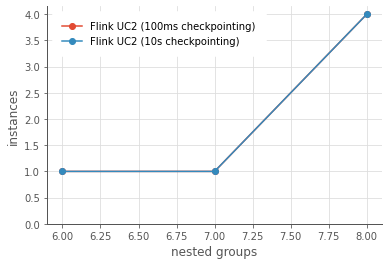

In [181]:
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='555555'
#plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='dddddd'
plt.rcParams['axes.spines.top']='false'
plt.rcParams['axes.spines.right']='false'
plt.rcParams['legend.frameon']='true'
plt.rcParams['legend.framealpha']='1'
plt.rcParams['legend.edgecolor']='1'
plt.rcParams['legend.borderpad']='1'





plt.figure() 
ax = df.plot(kind='line', marker='o')
#ax = df.plot(kind='line',x='dim_value', legend=False, use_index=True)
ax.set_ylabel('instances')
ax.set_xlabel('nested groups')
ax.set_ylim(ymin=0)
#ax.set_xlim(xmin=0)
plt.savefig('result-uc2-checkpointing.pdf', bbox_inches='tight')